### Imports


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import time


### Data Exploration

In [6]:

# Reload the CSV file
file_path = "assignTTSWING.csv"
df = pd.read_csv(file_path)


In [7]:
# Filter only feature columns (exclude metadata and IDs)
feature_columns = [col for col in df.columns if col.startswith(('a_', 'g_', 'ax_', 'ay_', 'az_', 'gx_', 'gy_', 'gz_'))]
features = df[feature_columns]

# Assign the labels
testmode_labels = df['testmode'] if 'testmode' in df.columns else None
gender_labels = df['gender'] if 'gender' in df.columns else None
age_labels = df['age'] if 'age' in df.columns else None
playYears_labels = df['playYears'] if 'playYears' in df.columns else None
height_labels = df['height'] if 'height' in df.columns else None
weight_labels = df['weight'] if 'weight' in df.columns else None
handedness_labels = df['handedness'] if 'handedness' in df.columns else None
holdRacketHanded_labels = df['holdRacketHanded'] if 'holdRacketHanded' in df.columns else None

# Combine all labels into a single DataFrame
labels_df = pd.DataFrame({
    'testmode': testmode_labels,
    'gender' : gender_labels,
    'age' : age_labels,
    'playYears' : playYears_labels,
    'height' : height_labels,
    'weight' : weight_labels,
    'handedness' : handedness_labels,
    'holdRacketHanded' : holdRacketHanded_labels
})


In [8]:
# Convert all labels to string type
labels_df = labels_df.astype(str)

In [9]:
# Count how many of each label we have
label_counts = labels_df.apply(pd.Series.value_counts).fillna(0).astype(int)

# Print the label counts
print("Label counts:")
print(label_counts)

Label counts:
        testmode  gender    age  playYears  height  weight  handedness  \
0           7505   38555      0          0       0       0       16105   
1          73850   58800      0          0       0       0       81250   
2          16000       0      0          0       0       0           0   
???            0       0      5          5       5       5           0   
high           0       0  18150      23200   29100   29250           0   
low            0       0  26900      21250   27450   31500           0   
medium         0       0  52300      52900   40800   36600           0   

        holdRacketHanded  
0                  16105  
1                  81250  
2                      0  
???                    0  
high                   0  
low                    0  
medium                 0  


In [10]:
# Reveal the rows that are ??? for age, playYears, height, weight
missing_labels = labels_df[labels_df.isin(['???']).any(axis=1)]

# Print the rows with missing labels
print("\nRows with missing labels:")
print(missing_labels)

# Create a list of all the rows that are ??? for age, playYears, height, weight
missing_rows = missing_labels.index.tolist()

# Delete the rows with missing labels from the labels and features DataFrames
labels_df_cleaned = labels_df.drop(missing_rows)
features_cleaned = features.drop(missing_rows)


Rows with missing labels:
      testmode gender  age playYears height weight handedness holdRacketHanded
9999         0      0  ???       ???    ???    ???          0                0
19999        0      0  ???       ???    ???    ???          0                0
29999        0      0  ???       ???    ???    ???          0                0
39999        0      0  ???       ???    ???    ???          0                0
49999        0      0  ???       ???    ???    ???          0                0


In [11]:
# Recheck that the invalid rows are gone
# Count how many of each label we have
label_counts = labels_df_cleaned.apply(pd.Series.value_counts)

# Print the label counts
print("Label counts:")
print(label_counts)

Label counts:
        testmode   gender      age  playYears   height   weight  handedness  \
0         7500.0  38550.0      NaN        NaN      NaN      NaN     16100.0   
1        73850.0  58800.0      NaN        NaN      NaN      NaN     81250.0   
2        16000.0      NaN      NaN        NaN      NaN      NaN         NaN   
high         NaN      NaN  18150.0    23200.0  29100.0  29250.0         NaN   
low          NaN      NaN  26900.0    21250.0  27450.0  31500.0         NaN   
medium       NaN      NaN  52300.0    52900.0  40800.0  36600.0         NaN   

        holdRacketHanded  
0                16100.0  
1                81250.0  
2                    NaN  
high                 NaN  
low                  NaN  
medium               NaN  


In [12]:
# Finally assign the X_train, X_test, X_val, y_train, y_test, y_val
# We will use 60% of the data for training, 20% for testing, and 20% for validation
# The y_train will be the height inside of the labels_df
X_train, X_temp, y_train, y_temp = train_test_split(features_cleaned, labels_df_cleaned['height'], test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

In [13]:
# Check the sizes of the splits
print(f"X_train size: {X_train.shape}")
print(f"X_val size: {X_val.shape}")
print(f"X_test size: {X_test.shape}")

# Check the sizes of the splits
print(f"y_train size: {y_train.shape}")
print(f"y_val size: {y_val.shape}")
print(f"y_test size: {y_test.shape}")

# Check the ratios of the splits
print(f"X_train ratio: {X_train.shape[0] / features_cleaned.shape[0]}")
print(f"X_val ratio: {X_val.shape[0] / features_cleaned.shape[0]}")
print(f"X_test ratio: {X_test.shape[0] / features_cleaned.shape[0]}")

# Check the ratios of the splits
print(f"y_train ratio: {y_train.shape[0] / labels_df_cleaned.shape[0]}")
print(f"y_val ratio: {y_val.shape[0] / labels_df_cleaned.shape[0]}")
print(f"y_test ratio: {y_test.shape[0] / labels_df_cleaned.shape[0]}")


X_train size: (58410, 34)
X_val size: (19470, 34)
X_test size: (19470, 34)
y_train size: (58410,)
y_val size: (19470,)
y_test size: (19470,)
X_train ratio: 0.6
X_val ratio: 0.2
X_test ratio: 0.2
y_train ratio: 0.6
y_val ratio: 0.2
y_test ratio: 0.2


#### SMOTE

In [14]:
# Check how many 'low', 'medium', and 'high' labels we have in the y_train
y_train_counts = y_train.value_counts()

# Print the y_train counts with percentage
y_train_counts_percentage = y_train_counts / y_train_counts.sum() * 100
print("\nY_train counts with percentage:")
print(y_train_counts_percentage)

print("\nY_train counts:")
print(y_train_counts)



Y_train counts with percentage:
height
medium    42.033898
high      29.727786
low       28.238315
Name: count, dtype: float64

Y_train counts:
height
medium    24552
high      17364
low       16494
Name: count, dtype: int64


In [15]:
# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Keep validation and test sets unchanged
# X_val, y_val remain as they are
# X_test, y_test remain as they are

# Print class distributions
print("Original training set distribution:", pd.Series(y_train).value_counts())
print("Balanced training set distribution:", pd.Series(y_train_balanced).value_counts())
print("Validation set distribution:", pd.Series(y_val).value_counts())
print("Test set distribution:", pd.Series(y_test).value_counts())

Original training set distribution: height
medium    24552
high      17364
low       16494
Name: count, dtype: int64
Balanced training set distribution: height
medium    24552
high      24552
low       24552
Name: count, dtype: int64
Validation set distribution: height
medium    8135
high      5800
low       5535
Name: count, dtype: int64
Test set distribution: height
medium    8113
high      5936
low       5421
Name: count, dtype: int64


#### STANDARDIZEA THE FEATURES

In [16]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for all features before standardization
features_cleaned.hist(bins=30, figsize=(18, 12), layout=(int(np.ceil(len(features_cleaned.columns)/6)), 6))
plt.suptitle('Feature Distributions Before Standardization', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = features_cleaned.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

### PCA

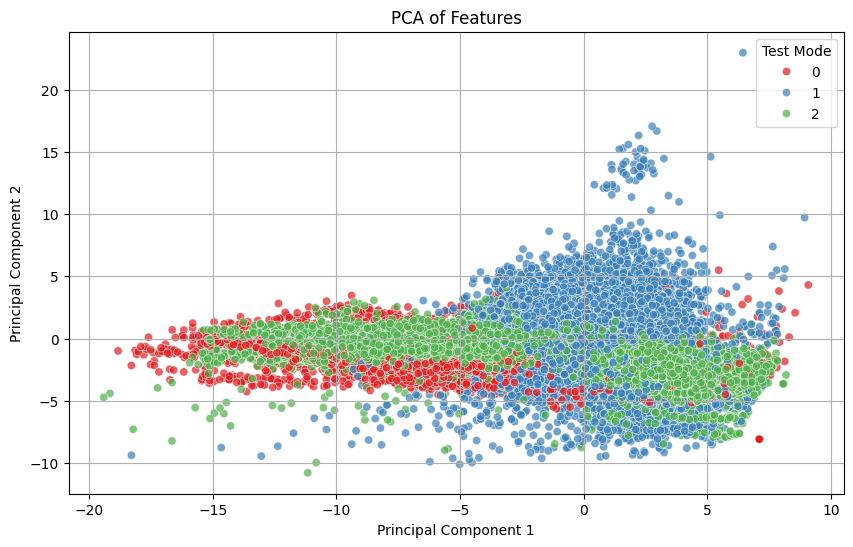

In [14]:
# Compute the PCA via the covariance matrix method

# Standardize the features
mean = features.mean()
std = features.std()
features_standardized = (features - mean) / std

# Compute the covariance matrix
cov_matrix = features_standardized.cov()

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Perform dimensionality reduction by multiplying the data by the top two eigenvectors
pca_features = np.dot(features_standardized, sorted_eigenvectors[:, :2])
pca_features_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_features_df, x='PC1', y='PC2', hue=testmode_labels, palette='Set1', alpha=0.7)
plt.title('PCA of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Test Mode')
plt.grid()
plt.savefig('pca_features.png')
plt.show()



In [15]:

# Again but with feature changed into ndarray
features_np = features.values

# Standardize the features
mean = np.mean(features_np, axis=0)
std_dev = np.std(features_np, axis=0)
features_standardized_np = (features_np - mean) / std_dev

# Compute the covariance matrix
cov_matrix_np = np.cov(features_standardized_np.T)

# Compute the eigenvalues and eigenvectors
eigenvalues_np, eigenvectors_np = np.linalg.eig(cov_matrix_np)
sorted_indices = np.argsort(eigenvalues_np)[::-1]
eigenvalues = eigenvalues_np[sorted_indices]
eigenvectors = eigenvectors_np[:, sorted_indices]

# Perform dimensionality reduction by multiplying the data by the top two eigenvectors
reduced_features = np.dot(features_standardized_np, eigenvectors[:, :2])



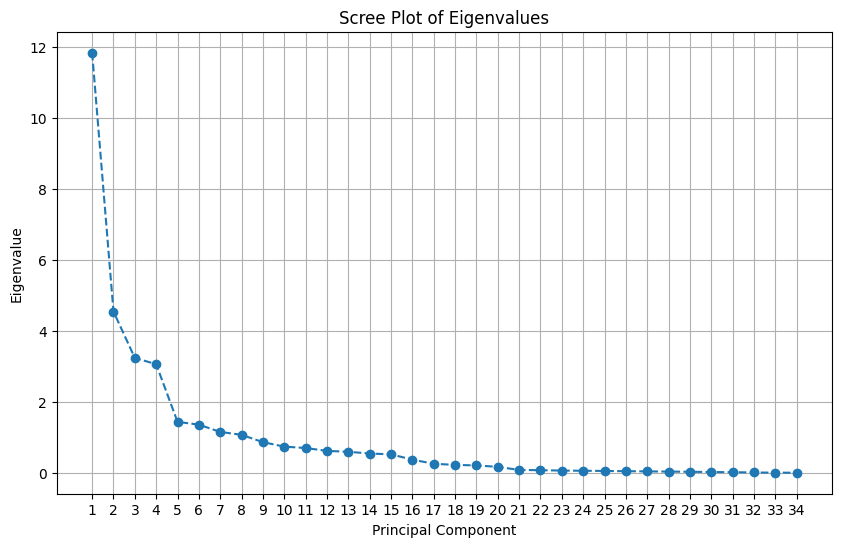

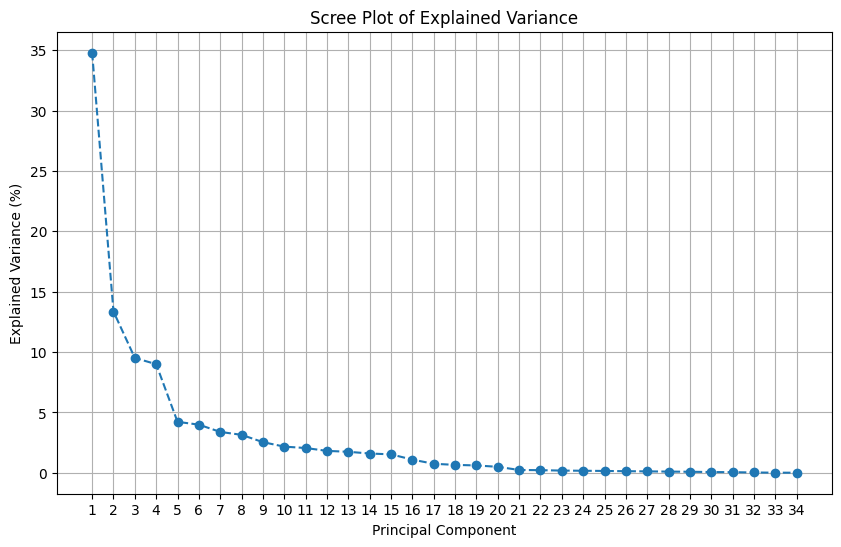

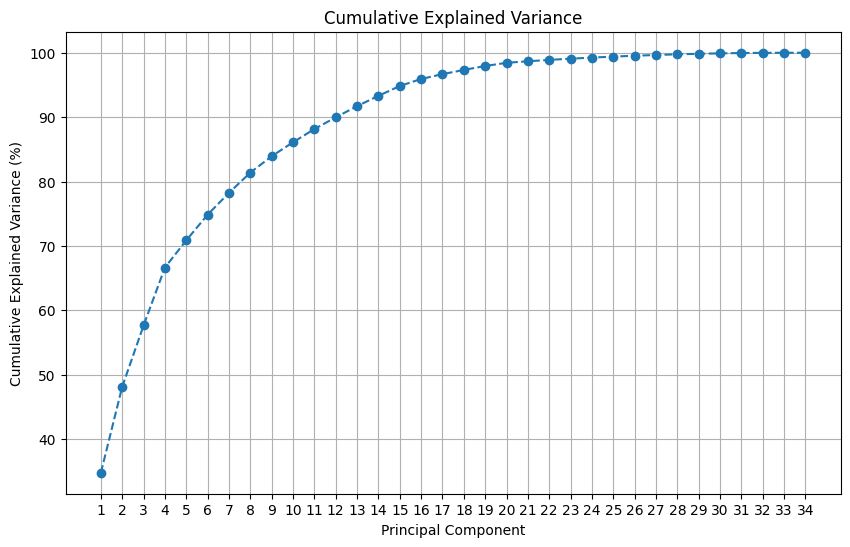

Total variance explained by all components: 100.00%


In [16]:
# Make a Scree graph for all eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot of Eigenvalues')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid()
plt.savefig('scree_plot.png')
plt.show()

# Make another Scree graph for all eigenvalues but the y-axis is the percentage of variance explained
plt.figure(figsize=(10, 6))
explained_variance = eigenvalues / np.sum(eigenvalues) * 100
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot of Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

# Make a cumulative explained variance plot
plt.figure(figsize=(10, 6))
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance (%)')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid()
plt.show()

# Check that the percentages add up to 100%
total_variance = np.sum(explained_variance)
print(f"Total variance explained by all components: {total_variance:.2f}%")


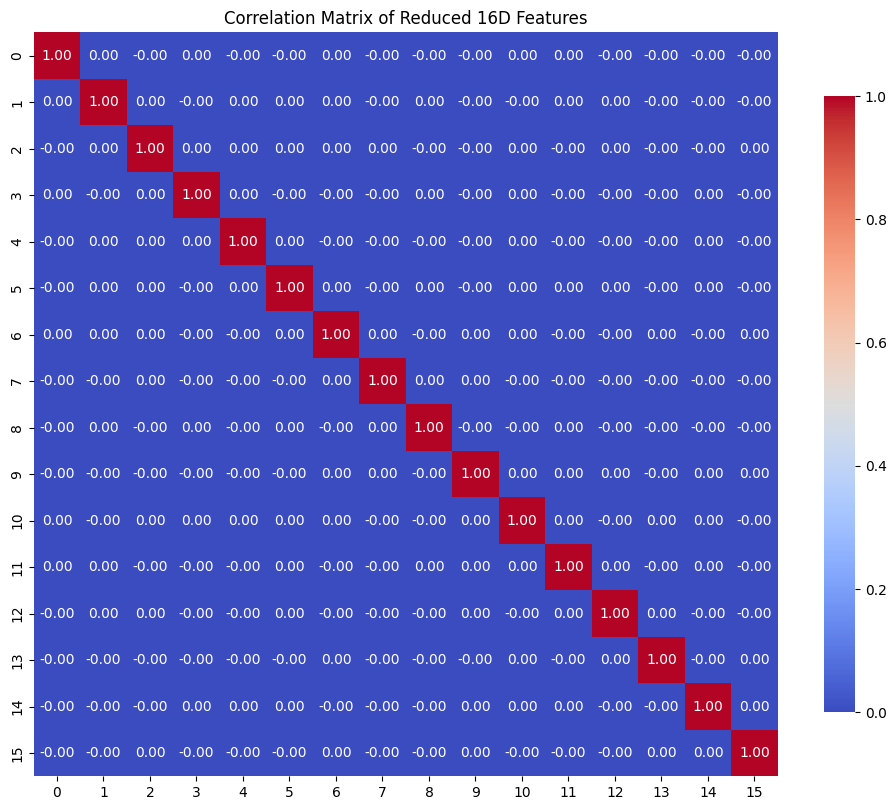

In [17]:
# Reduce the features to 16 dimensions using PCA
reduced_features_16 = np.dot(features_standardized_np, eigenvectors[:, :16])

# Plot the correlation matrix of the reduced 16D features
plt.figure(figsize=(12, 10))
sns.heatmap(np.corrcoef(reduced_features_16.T), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Reduced 16D Features')
plt.show()


In [18]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


### K-NN ALGORITHM

#### K-NN WITH ORIGINAL DATASET

In [19]:
def run_knn_from_split(X_train, X_test, y_train, y_test, n_neighbors=5, class_names=None, plot_confusion=False, verbose=False, label_name=""):
    # Fit KNN
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Accuracy and loss
    accuracy = accuracy_score(y_test, y_pred)
    loss = 1 - accuracy

    if verbose:
        print(f"\nK-NN Results for label: {label_name}")
        print(classification_report(y_test, y_pred, target_names=class_names))
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Loss: {loss:.4f}")

    if plot_confusion:
        from sklearn.metrics import confusion_matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix: {label_name}')
        plt.tight_layout()
        plt.show()

    return accuracy, loss, knn

# # Example usage:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

# label_of_interest = 'height'
# y = labels_df[label_of_interest].values
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)
# class_names = le.classes_

# # Split once
# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
# )

# # Run KNN for k=1
# accuracy, loss, _ = run_knn_from_split(X_train, X_test, y_train, y_test, n_neighbors=1, class_names=class_names, label_name=label_of_interest)


n_neighbors=1: accuracy=0.8627, loss=0.1373
n_neighbors=2: accuracy=0.8447, loss=0.1553
n_neighbors=4: accuracy=0.8578, loss=0.1422
n_neighbors=8: accuracy=0.8551, loss=0.1449
n_neighbors=16: accuracy=0.8425, loss=0.1575
n_neighbors=32: accuracy=0.8201, loss=0.1799
n_neighbors=64: accuracy=0.7934, loss=0.2066
n_neighbors=128: accuracy=0.7467, loss=0.2533
n_neighbors=256: accuracy=0.6928, loss=0.3072
n_neighbors=512: accuracy=0.6274, loss=0.3726
n_neighbors=1024: accuracy=0.5648, loss=0.4352
n_neighbors=2048: accuracy=0.5169, loss=0.4831
n_neighbors=4096: accuracy=0.4612, loss=0.5388


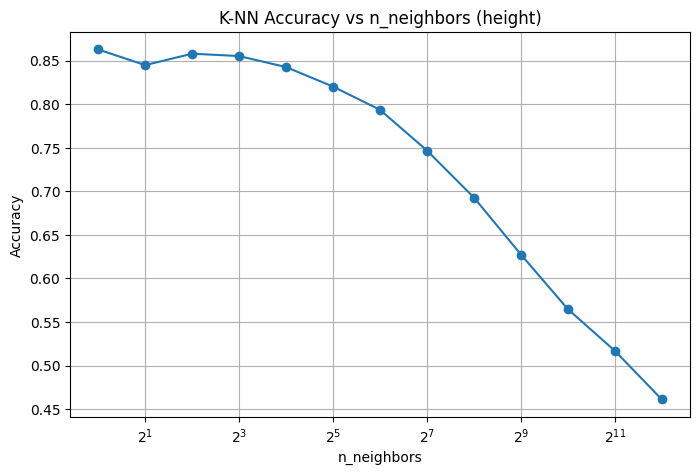

In [20]:
n_neighbors_list = [2**i for i in range(13)]
results = []

label_of_interest = 'height'  # any label you want

# Encode both training and test labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_balanced)  # Fit on training data
y_test_encoded = le.transform(y_test)  # Transform test data using same encoder
class_names = le.classes_

for n in n_neighbors_list:
    try:
        accuracy, loss, knn = run_knn_from_split(
            X_train_scaled, 
            X_test_scaled,  # Use scaled test data
            y_train_encoded,  # Use encoded training labels
            y_test_encoded,  # Use encoded test labels
            n_neighbors=n, 
            class_names=class_names, 
            label_name=label_of_interest
        )
        results.append({'n_neighbors': n, 'accuracy': accuracy, 'loss': loss, 'knn_model': knn})
        print(f"n_neighbors={n}: accuracy={accuracy:.4f}, loss={loss:.4f}")
    except ValueError as e:
        print(f"n_neighbors={n}: Error - {e}")

# Plot accuracy vs n_neighbors
plt.figure(figsize=(8, 5))
plt.plot([r['n_neighbors'] for r in results], [r['accuracy'] for r in results], marker='o')
plt.xscale('log', base=2)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title(f'K-NN Accuracy vs n_neighbors ({label_of_interest})')
plt.grid(True)
plt.show()

n_neighbors=1: train_acc=0.9973, test_acc=0.8627
n_neighbors=2: train_acc=0.9349, test_acc=0.8447
n_neighbors=4: train_acc=0.9194, test_acc=0.8578
n_neighbors=8: train_acc=0.8941, test_acc=0.8551
n_neighbors=16: train_acc=0.8667, test_acc=0.8425
n_neighbors=32: train_acc=0.8369, test_acc=0.8201
n_neighbors=64: train_acc=0.8013, test_acc=0.7934
n_neighbors=128: train_acc=0.7557, test_acc=0.7467
n_neighbors=256: train_acc=0.7064, test_acc=0.6928
n_neighbors=512: train_acc=0.6489, test_acc=0.6274
n_neighbors=1024: train_acc=0.5909, test_acc=0.5648
n_neighbors=2048: train_acc=0.5501, test_acc=0.5169
n_neighbors=4096: train_acc=0.5029, test_acc=0.4612


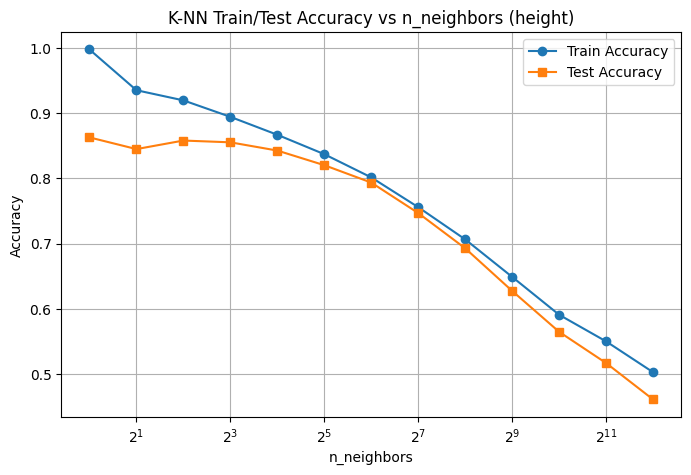

In [28]:
# Plot accuracy against the test AND training data
n_neighbors_list = [2**i for i in range(13)]
results = []

label_of_interest = 'height'  # any label you want

# Encode both training and test labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_balanced)  # Fit on training data
y_test_encoded = le.transform(y_test)  # Transform test data using same encoder
class_names = le.classes_

for n in n_neighbors_list:
    try:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train_scaled, y_train_encoded)
        y_train_pred = knn.predict(X_train_scaled)
        y_test_pred = knn.predict(X_test_scaled)
        train_acc = accuracy_score(y_train_encoded, y_train_pred)
        test_acc = accuracy_score(y_test_encoded, y_test_pred)
        results.append({'n_neighbors': n, 'train_accuracy': train_acc, 'test_accuracy': test_acc, 'knn_model': knn})
        print(f"n_neighbors={n}: train_acc={train_acc:.4f}, test_acc={test_acc:.4f}")
    except ValueError as e:
        print(f"n_neighbors={n}: Error - {e}")

# Plot training and test accuracy vs n_neighbors
plt.figure(figsize=(8, 5))
plt.plot([r['n_neighbors'] for r in results], [r['train_accuracy'] for r in results], marker='o', label='Train Accuracy')
plt.plot([r['n_neighbors'] for r in results], [r['test_accuracy'] for r in results], marker='s', label='Test Accuracy')
plt.xscale('log', base=2)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title(f'K-NN Train/Test Accuracy vs n_neighbors ({label_of_interest})')
plt.legend()
plt.grid(True)
plt.show()

##### K-NN CROSS-VALIDATION



In [22]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

# Combine X_train and X_test for X input into K-Fold
X_kfold = np.vstack((X_train, X_test))
y_fold = np.hstack((y_train, y_test))

# Scale X_kfold
X_kfold_scaled = scaler.fit_transform(X_kfold)

k_values = [2**i for i in range(6)]
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Store the results
results_kfold = []
all_scores = []  # Store all fold scores for each k

for k in k_values:
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    scores = cross_val_score(pipeline, X_kfold_scaled, y_fold, cv=cv, scoring='accuracy')
    print(f"k={k}: mean accuracy={scores.mean():.4f} (+/- {scores.std():.4f})")
    results_kfold.append({
        'k': k,
        'mean_accuracy': scores.mean(),
        'std_accuracy': scores.std(),
        'min_accuracy': scores.min(),
        'max_accuracy': scores.max()
    })
    all_scores.append(scores)  # Save the array of scores for boxplot

k=1: mean accuracy=0.8713 (+/- 0.0041)
k=2: mean accuracy=0.8524 (+/- 0.0052)
k=4: mean accuracy=0.8562 (+/- 0.0049)
k=8: mean accuracy=0.8556 (+/- 0.0044)
k=16: mean accuracy=0.8464 (+/- 0.0039)
k=32: mean accuracy=0.8275 (+/- 0.0042)


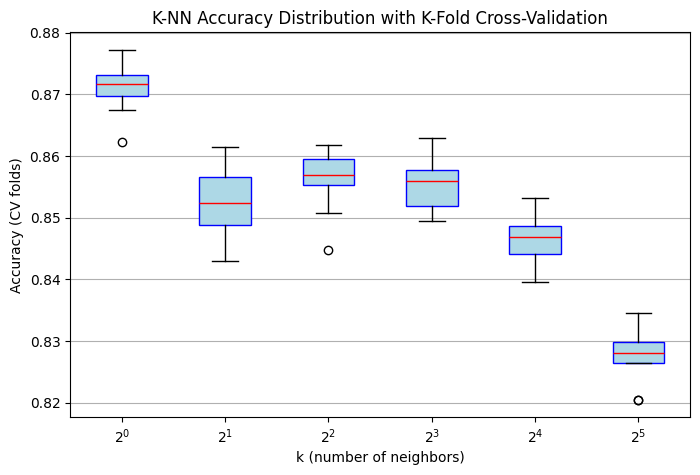

In [25]:
plt.figure(figsize=(8, 5))
plt.boxplot(
    all_scores,
    positions=range(len(k_values)),
    widths=0.5,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    medianprops=dict(color='red')
)

plt.xticks(
    range(len(k_values)),
    [f"$2^{i}$" for i in range(len(k_values))]
)
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy (CV folds)')
plt.title('K-NN Accuracy Distribution with K-Fold Cross-Validation')
plt.grid(True, axis='y')
plt.show()

#### K-NN WITH PCA REDUCTION

Original data - n_neighbors=1: accuracy=0.8627
Original data - n_neighbors=2: accuracy=0.8447
Original data - n_neighbors=4: accuracy=0.8578
Original data - n_neighbors=8: accuracy=0.8551
Original data - n_neighbors=16: accuracy=0.8425
Original data - n_neighbors=32: accuracy=0.8201
Original data - n_neighbors=64: accuracy=0.7934
Original data - n_neighbors=128: accuracy=0.7467
Original data - n_neighbors=256: accuracy=0.6928
Original data - n_neighbors=512: accuracy=0.6274
Original data - n_neighbors=1024: accuracy=0.5648
Original data - n_neighbors=2048: accuracy=0.5169
Original data - n_neighbors=4096: accuracy=0.4612
PCA-16D - n_neighbors=1: accuracy=0.8304
PCA-16D - n_neighbors=2: accuracy=0.8112
PCA-16D - n_neighbors=4: accuracy=0.8295
PCA-16D - n_neighbors=8: accuracy=0.8285
PCA-16D - n_neighbors=16: accuracy=0.8193
PCA-16D - n_neighbors=32: accuracy=0.8010
PCA-16D - n_neighbors=64: accuracy=0.7691
PCA-16D - n_neighbors=128: accuracy=0.7276
PCA-16D - n_neighbors=256: accuracy=0.

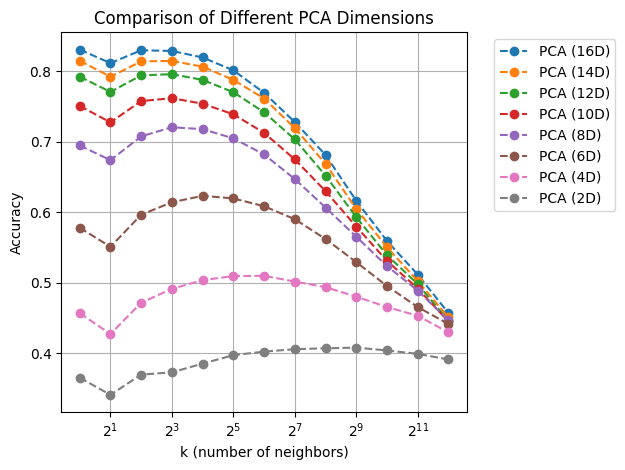

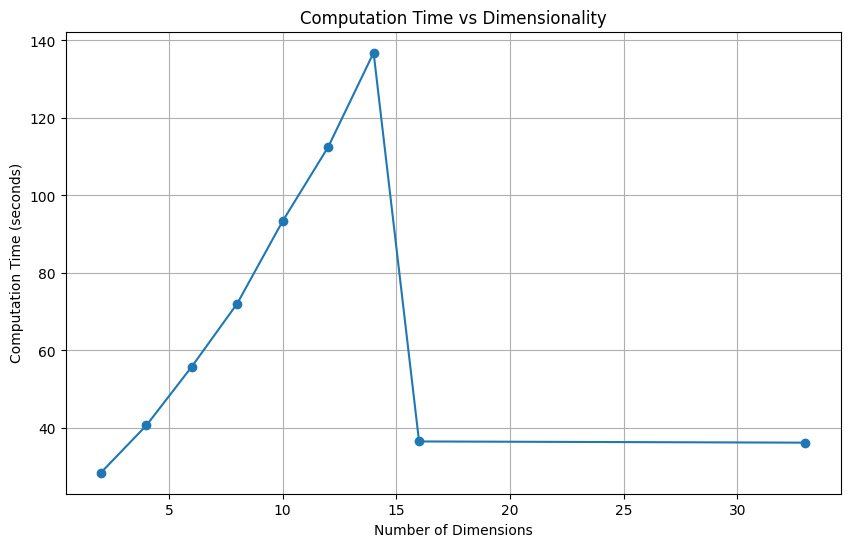


Computation times:
Original (33D): 36.21 seconds
PCA-16D: 36.52 seconds
PCA-14D: 136.82 seconds
PCA-12D: 112.48 seconds
PCA-10D: 93.40 seconds
PCA-8D: 72.11 seconds
PCA-6D: 55.82 seconds
PCA-4D: 40.65 seconds
PCA-2D: 28.45 seconds


In [27]:
# Compare K-NN performance with different PCA dimensions
pca_dimensions = [16, 14, 12, 10, 8, 6, 4, 2]
n_neighbors_list = [2**i for i in range(13)]
results_multi_pca = {d: [] for d in pca_dimensions}
computation_times = {}

# First run KNN on original data
start_time = time.time()
results_original = []

for n in n_neighbors_list:
    try:
        accuracy, loss, knn = run_knn_from_split(
            X_train_scaled, 
            X_test_scaled,
            y_train_encoded,
            y_test_encoded,
            n_neighbors=n, 
            class_names=class_names, 
            label_name="Original (33D)"
        )
        results_original.append({'n_neighbors': n, 'accuracy': accuracy, 'loss': loss})
        print(f"Original data - n_neighbors={n}: accuracy={accuracy:.4f}")
    except ValueError as e:
        print(f"Original data - n_neighbors={n}: Error - {e}")

computation_times[33] = time.time() - start_time

# Prepare all PCA transformations first
pca_data = {}
for n_components in pca_dimensions:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    pca_data[n_components] = (X_train_pca, X_test_pca)

# Run KNN for each PCA dimension
for n_components in pca_dimensions:
    X_train_pca, X_test_pca = pca_data[n_components]
    
    # Start timing only K-NN part
    start_time = time.time()
    
    for n in n_neighbors_list:
        try:
            accuracy, loss, knn = run_knn_from_split(
                X_train_pca, 
                X_test_pca,
                y_train_encoded,
                y_test_encoded,
                n_neighbors=n, 
                class_names=class_names, 
                label_name=f"PCA-{n_components}D"
            )
            results_multi_pca[n_components].append(
                {'n_neighbors': n, 'accuracy': accuracy, 'loss': loss}
            )
            print(f"PCA-{n_components}D - n_neighbors={n}: accuracy={accuracy:.4f}")
        except ValueError as e:
            print(f"PCA-{n_components}D - n_neighbors={n}: Error - {e}")
    
    # Record only K-NN computation time
    computation_times[n_components] = time.time() - start_time
    
    # Plot results for this PCA dimension
    plt.plot([r['n_neighbors'] for r in results_multi_pca[n_components]],
             [r['accuracy'] for r in results_multi_pca[n_components]],
             marker='o', label=f'PCA ({n_components}D)', linestyle='--')

plt.xscale('log', base=2)
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.title(f'Comparison of Different PCA Dimensions')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot computation times
plt.figure(figsize=(10, 6))
sorted_dimensions = sorted(computation_times.keys(), reverse=True)  # Sort dimensions in descending order
times = [computation_times[d] for d in sorted_dimensions]
plt.plot(sorted_dimensions, times, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation Time vs Dimensionality')
plt.grid(True)
plt.show()

# Print computation times
print("\nComputation times:")
print(f"Original (33D): {computation_times[33]:.2f} seconds")
for dim in pca_dimensions:
    print(f"PCA-{dim}D: {computation_times[dim]:.2f} seconds")

#### K-NN ROC curve

Best fold accuracy: 0.8772


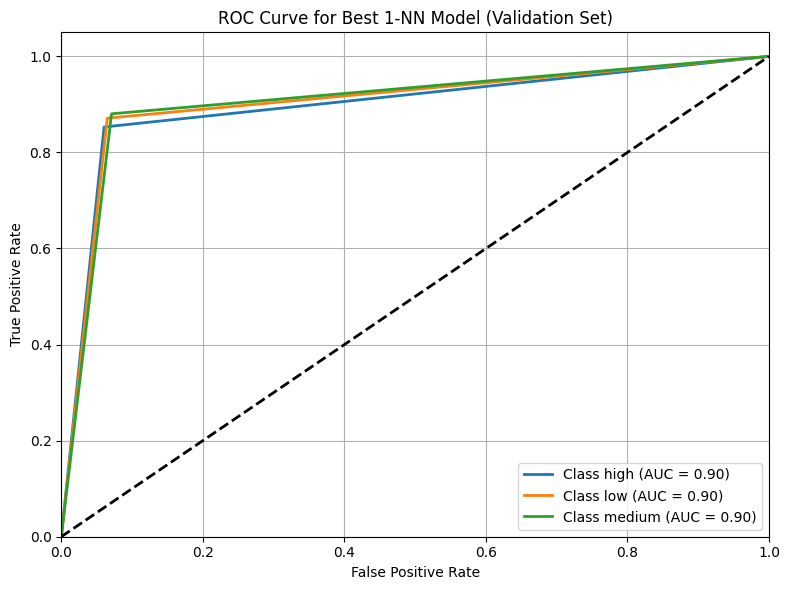

In [17]:
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt

# Prepare data for cross-validation (already in your code)
X_kfold = np.vstack((X_train, X_test))
y_fold = np.hstack((y_train, y_test))
X_kfold_scaled = scaler.fit_transform(X_kfold)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Store models and scores for k=1
models = []
scores = []

for train_idx, test_idx in cv.split(X_kfold_scaled, y_fold):
    X_tr, X_te = X_kfold_scaled[train_idx], X_kfold_scaled[test_idx]
    y_tr, y_te = y_fold[train_idx], y_fold[test_idx]
    # Pipeline with SMOTE and 1-NN
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=1))
    ])
    pipeline.fit(X_tr, y_tr)
    acc = pipeline.score(X_te, y_te)
    models.append(pipeline)
    scores.append(acc)

# Find the best model (highest accuracy on its fold)
best_idx = np.argmax(scores)
best_model = models[best_idx]
print(f"Best fold accuracy: {scores[best_idx]:.4f}")

# Use the best model to predict probabilities on the validation set
y_val_proba = best_model.predict_proba(X_val_scaled)

# Binarize y_val for multiclass ROC
lb = LabelBinarizer()
y_val_binarized = lb.fit_transform(y_val)
if y_val_binarized.shape[1] == 1:
    y_val_binarized = np.hstack([1 - y_val_binarized, y_val_binarized])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_val_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {lb.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best 1-NN Model (Validation Set)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

#### K-NN Confusion Matrix

<Figure size 600x500 with 0 Axes>

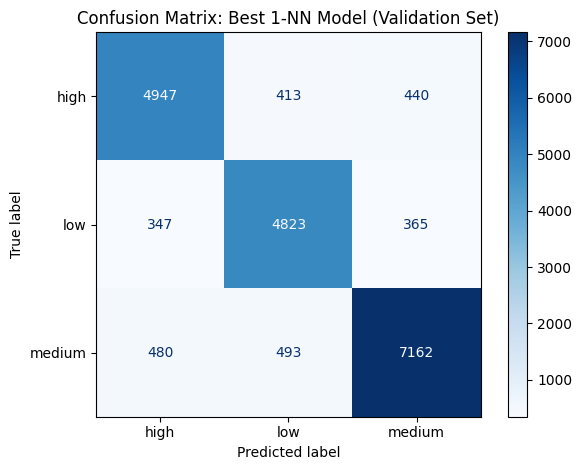

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the validation set
y_val_pred = best_model.predict(X_val_scaled)

# If you used label encoding, ensure y_val_pred and y_val are comparable
# If y_val is not encoded, encode it with the same encoder as used in training
# Example:
# y_val_encoded = le.transform(y_val)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred, labels=best_model.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix: Best 1-NN Model (Validation Set)')
plt.tight_layout()
plt.show()

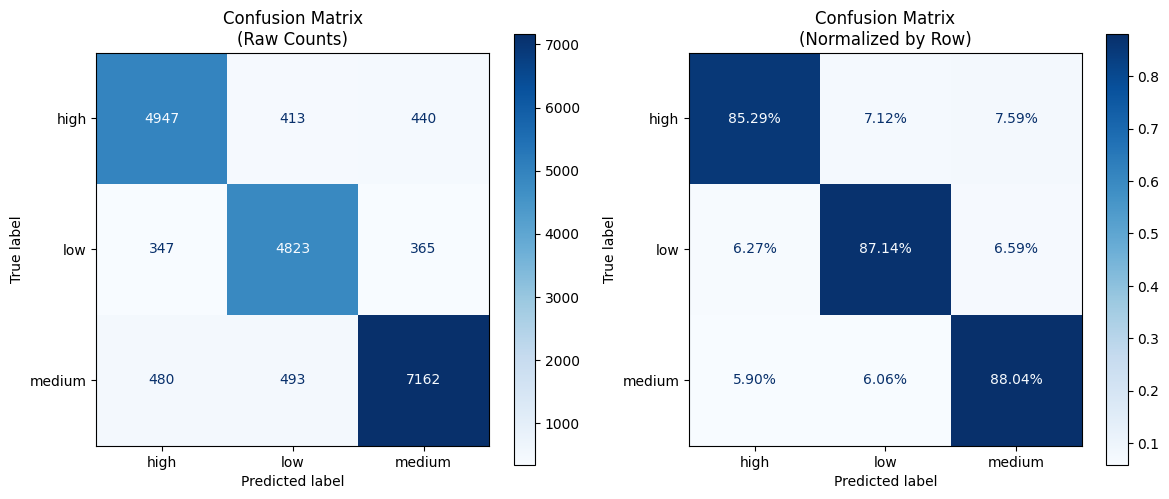


Classification rates per class:
high: 85.29% correct
low: 87.14% correct
medium: 88.04% correct


In [19]:
# Normalized confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict on the validation set
y_val_pred = best_model.predict(X_val_scaled)

# Compute confusion matrices (raw counts and normalized)
cm = confusion_matrix(y_val, y_val_pred, labels=best_model.classes_)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot raw counts
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp1.plot(ax=ax1, cmap='Blues', values_format='d')
ax1.set_title('Confusion Matrix\n(Raw Counts)')

# Plot normalized values
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=best_model.classes_)
disp2.plot(ax=ax2, cmap='Blues', values_format='.2%')
ax2.set_title('Confusion Matrix\n(Normalized by Row)')

plt.tight_layout()
plt.show()

# Print classification rates for each class
print("\nClassification rates per class:")
for i, class_name in enumerate(best_model.classes_):
    print(f"{class_name}: {cm_normalized[i][i]:.2%} correct")

In [20]:
from sklearn.metrics import classification_report

# Predict on the validation set
y_val_pred = best_model.predict(X_val_scaled)

# Print precision, recall, and F1 score for each class
print("Precision, Recall, and F1 Score (Validation Set):\n")
print(classification_report(y_val, y_val_pred, target_names=best_model.classes_))

Precision, Recall, and F1 Score (Validation Set):

              precision    recall  f1-score   support

        high       0.86      0.85      0.85      5800
         low       0.84      0.87      0.86      5535
      medium       0.90      0.88      0.89      8135

    accuracy                           0.87     19470
   macro avg       0.87      0.87      0.87     19470
weighted avg       0.87      0.87      0.87     19470



### RANDOM FOREST CLASSIFIER

#### Random Forest on original dataset

n_estimators=10, max_depth=None: accuracy=0.8004
n_estimators=10, max_depth=5: accuracy=0.5370
n_estimators=10, max_depth=10: accuracy=0.6980
n_estimators=10, max_depth=20: accuracy=0.8026
n_estimators=10, max_depth=30: accuracy=0.8043
n_estimators=10, max_depth=40: accuracy=0.8004
n_estimators=50, max_depth=None: accuracy=0.8485
n_estimators=50, max_depth=5: accuracy=0.5396
n_estimators=50, max_depth=10: accuracy=0.7188
n_estimators=50, max_depth=20: accuracy=0.8461
n_estimators=50, max_depth=30: accuracy=0.8525
n_estimators=50, max_depth=40: accuracy=0.8493
n_estimators=100, max_depth=None: accuracy=0.8578
n_estimators=100, max_depth=5: accuracy=0.5336
n_estimators=100, max_depth=10: accuracy=0.7228
n_estimators=100, max_depth=20: accuracy=0.8519
n_estimators=100, max_depth=30: accuracy=0.8589
n_estimators=100, max_depth=40: accuracy=0.8580
n_estimators=200, max_depth=None: accuracy=0.8601
n_estimators=200, max_depth=5: accuracy=0.5381
n_estimators=200, max_depth=10: accuracy=0.7233


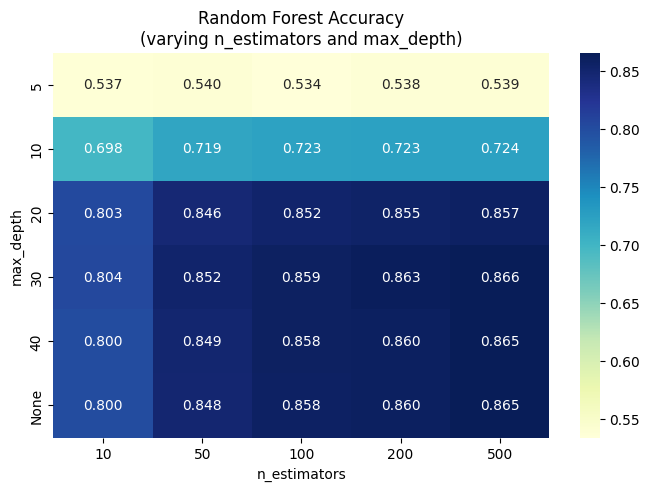

In [23]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameter ranges
n_estimators_list = [10, 50, 100, 200, 500]
max_depth_list = [None, 5, 10, 20, 30, 40]

# Store results
results = []

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            criterion='gini',
            random_state=42
        )
        rf.fit(X_train_scaled, y_train_balanced)
        y_pred = rf.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        results.append({
            'n_estimators': n_estimators,
            'max_depth': max_depth if max_depth is not None else 'None',
            'accuracy': acc
        })
        print(f"n_estimators={n_estimators}, max_depth={max_depth}: accuracy={acc:.4f}")

# Convert results to DataFrame for heatmap
df_results = pd.DataFrame(results)
pivot_table = df_results.pivot(index='max_depth', columns='n_estimators', values='accuracy')

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Random Forest Accuracy\n(varying n_estimators and max_depth)")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

n_estimators=800, max_depth=None: accuracy=0.8658
n_estimators=800, max_depth=5: accuracy=0.5377
n_estimators=800, max_depth=10: accuracy=0.7250
n_estimators=800, max_depth=20: accuracy=0.8582
n_estimators=800, max_depth=30: accuracy=0.8673
n_estimators=800, max_depth=40: accuracy=0.8659
n_estimators=1400, max_depth=None: accuracy=0.8667
n_estimators=1400, max_depth=5: accuracy=0.5368
n_estimators=1400, max_depth=10: accuracy=0.7255
n_estimators=1400, max_depth=20: accuracy=0.8581
n_estimators=1400, max_depth=30: accuracy=0.8671
n_estimators=1400, max_depth=40: accuracy=0.8666


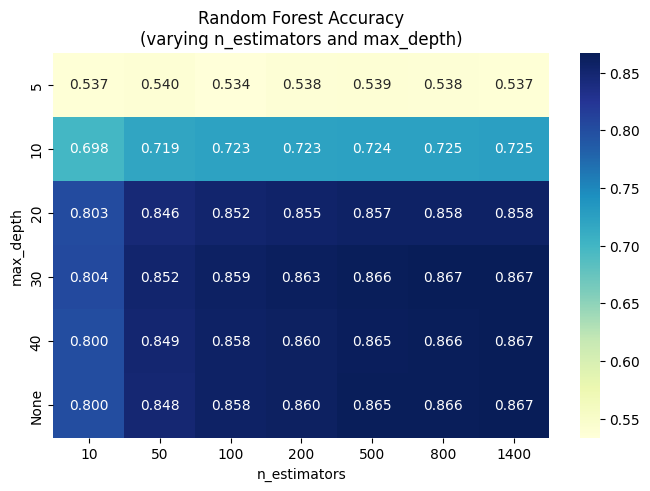

In [24]:
# Continue with more results

# Define parameter ranges
n_estimators_list = [800, 1400]
max_depth_list = [None, 5, 10, 20, 30, 40]

# Store results
results_2 = []

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            criterion='gini',
            random_state=42
        )
        rf.fit(X_train_scaled, y_train_balanced)
        y_pred = rf.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        results_2.append({
            'n_estimators': n_estimators,
            'max_depth': max_depth if max_depth is not None else 'None',
            'accuracy': acc
        })
        print(f"n_estimators={n_estimators}, max_depth={max_depth}: accuracy={acc:.4f}")

# Combine results with results_2 to make a combined results
combined_results = results + results_2

# Convert results to DataFrame for heatmap
df_results = pd.DataFrame(combined_results)
pivot_table = df_results.pivot(index='max_depth', columns='n_estimators', values='accuracy')

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Random Forest Accuracy\n(varying n_estimators and max_depth)")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

In [33]:
# SAME AS ABOVE BUT WITH TRAINING AND TEST ACCURACY

# Define parameter ranges
n_estimators_list = [10, 50, 100, 200, 500, 800, 1400]
max_depth_list = [None, 5, 10, 20, 30, 40]

# Store results
results = []

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            criterion='gini',
            random_state=42
        )
        rf.fit(X_train_scaled, y_train_balanced)
        y_train_pred = rf.predict(X_train_scaled)
        y_test_pred = rf.predict(X_test_scaled)
        train_acc = accuracy_score(y_train_balanced, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        results.append({
            'n_estimators': n_estimators,
            'max_depth': max_depth if max_depth is not None else 'None',
            'train_accuracy': train_acc,
            'test_accuracy': test_acc
        })
        print(f"n_estimators={n_estimators}, max_depth={max_depth}: train_acc={train_acc:.4f}, test_acc={test_acc:.4f}")



n_estimators=10, max_depth=None: train_acc=0.9930, test_acc=0.8004
n_estimators=10, max_depth=5: train_acc=0.5678, test_acc=0.5370
n_estimators=10, max_depth=10: train_acc=0.7534, test_acc=0.6980
n_estimators=10, max_depth=20: train_acc=0.9834, test_acc=0.8026
n_estimators=10, max_depth=30: train_acc=0.9925, test_acc=0.8043
n_estimators=10, max_depth=40: train_acc=0.9930, test_acc=0.8004
n_estimators=50, max_depth=None: train_acc=0.9973, test_acc=0.8485
n_estimators=50, max_depth=5: train_acc=0.5676, test_acc=0.5396
n_estimators=50, max_depth=10: train_acc=0.7745, test_acc=0.7188
n_estimators=50, max_depth=20: train_acc=0.9940, test_acc=0.8461
n_estimators=50, max_depth=30: train_acc=0.9973, test_acc=0.8525
n_estimators=50, max_depth=40: train_acc=0.9973, test_acc=0.8493
n_estimators=100, max_depth=None: train_acc=0.9973, test_acc=0.8578
n_estimators=100, max_depth=5: train_acc=0.5645, test_acc=0.5336
n_estimators=100, max_depth=10: train_acc=0.7801, test_acc=0.7228
n_estimators=100, m

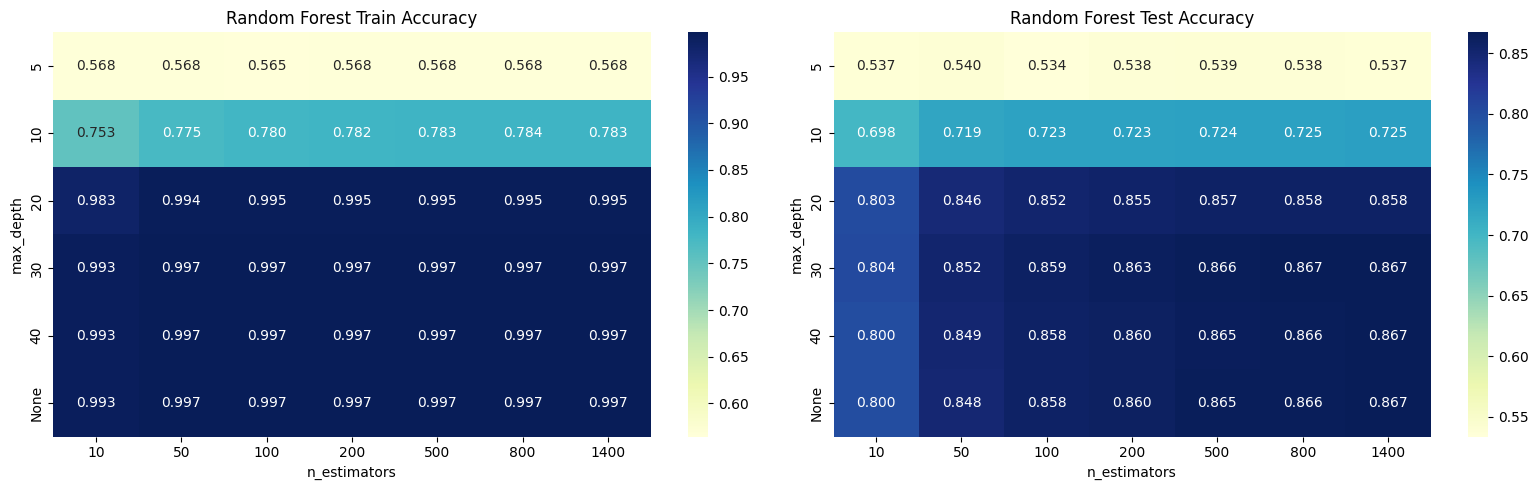

In [34]:
# Convert results to DataFrame for heatmap
df_results = pd.DataFrame(results)

# Pivot for heatmaps
pivot_train = df_results.pivot(index='max_depth', columns='n_estimators', values='train_accuracy')
pivot_test = df_results.pivot(index='max_depth', columns='n_estimators', values='test_accuracy')

# Plot heatmaps
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.heatmap(pivot_train, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Random Forest Train Accuracy")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")

plt.subplot(1, 2, 2)
sns.heatmap(pivot_test, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Random Forest Test Accuracy")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")

plt.tight_layout()
plt.show()

#### Random Forest on PCA reduced dataset

In [ ]:
# List of dimensions to test (including original)
dimensions = [X_train_scaled.shape[1], 16, 8, 4, 2]
times = []
accuracies = []

for dim in dimensions:
    if dim == X_train_scaled.shape[1]:
        # Use original data
        X_train_dim = X_train_scaled
        X_test_dim = X_test_scaled
    else:
        # PCA reduction
        pca = PCA(n_components=dim, random_state=42)
        X_train_dim = pca.fit_transform(X_train_scaled)
        X_test_dim = pca.transform(X_test_scaled)
    
    # Measure time
    start = time.time()
    rf = RandomForestClassifier(n_estimators=200, max_depth=30, criterion='gini', random_state=42)
    rf.fit(X_train_dim, y_train_balanced)
    y_pred = rf.predict(X_test_dim)
    elapsed = time.time() - start
    acc = accuracy_score(y_test, y_pred)
    
    times.append(elapsed)
    accuracies.append(acc)
    print(f"Dimensions: {dim}, Time: {elapsed:.2f}s, Accuracy: {acc:.4f}")

# # Plot time vs dimensions
# plt.figure(figsize=(8, 5))
# plt.plot(dimensions, times, marker='o')
# plt.xlabel('Number of Dimensions')
# plt.ylabel('Time Taken (seconds)')
# plt.title('Random Forest: Time vs Number of Dimensions')
# plt.grid(True)
# plt.show()

# # Plot accuracy vs dimensions
# plt.figure(figsize=(8, 5))
# plt.plot(dimensions, accuracies, marker='o')
# plt.xlabel('Number of Dimensions')
# plt.ylabel('Accuracy')
# plt.title('Random Forest: Accuracy vs Number of Dimensions')
# plt.grid(True)
# plt.show()

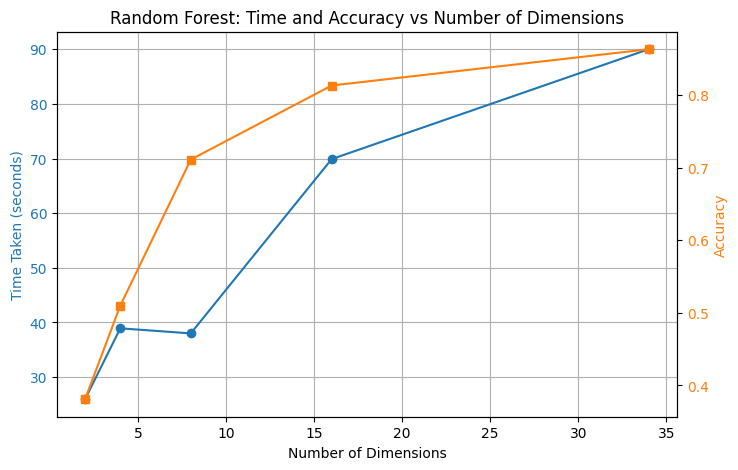

In [27]:
plt.figure(figsize=(8, 5))
ax1 = plt.gca()
color1 = 'tab:blue'
color2 = 'tab:orange'

# Plot time taken (left y-axis)
ax1.plot(dimensions, times, marker='o', color=color1, label='Time Taken (s)')
ax1.set_xlabel('Number of Dimensions')
ax1.set_ylabel('Time Taken (seconds)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create a second y-axis for accuracy
ax2 = ax1.twinx()
ax2.plot(dimensions, accuracies, marker='s', color=color2, label='Accuracy')
ax2.set_ylabel('Accuracy', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Random Forest: Time and Accuracy vs Number of Dimensions')
ax1.grid(True)
plt.show()

#### Random Forest with cross-validation

max_depth=5: mean=0.5716, std=0.0051
max_depth=10: mean=0.7391, std=0.0082
max_depth=20: mean=0.8605, std=0.0042
max_depth=30: mean=0.8661, std=0.0039
max_depth=40: mean=0.8674, std=0.0042
max_depth=None: mean=0.8675, std=0.0041


C:\Users\Volter\AppData\Local\Temp\ipykernel_26832\810433626.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


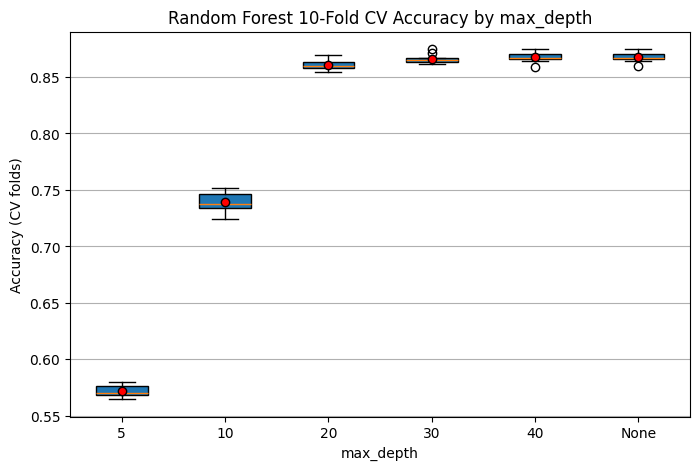

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Combine train and test sets
X_kfold = np.vstack((X_train, X_test))
y_fold = np.hstack((y_train, y_test))

max_depth_list = [5, 10, 20, 30, 40, None]
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
all_scores = []

for max_depth in max_depth_list:
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=max_depth,
        criterion='gini',
        random_state=42
    )
    scores = cross_val_score(rf, X_kfold, y_fold, cv=cv, scoring='accuracy')
    all_scores.append(scores)
    print(f"max_depth={max_depth}: mean={scores.mean():.4f}, std={scores.std():.4f}")

# Plot box-and-whisker plots with mean
plt.figure(figsize=(8, 5))
plt.boxplot(
    all_scores,
    labels=[str(md) for md in max_depth_list],
    patch_artist=True,
    showmeans=True,
    meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black')
)
plt.xlabel('max_depth')
plt.ylabel('Accuracy (CV folds)')
plt.title('Random Forest 10-Fold CV Accuracy by max_depth')
plt.grid(True, axis='y')
plt.show()

#### Random Forest ROC Curve

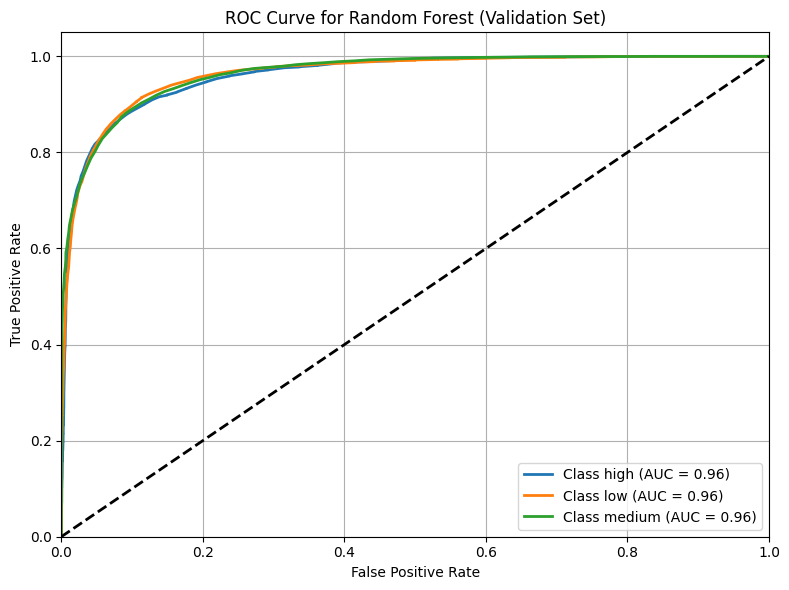

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# Train the best model
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train_scaled, y_train_balanced)

# Predict probabilities on validation set
y_val_proba = rf.predict_proba(X_val_scaled)

# Binarize the validation labels for multiclass ROC
lb = LabelBinarizer()
y_val_binarized = lb.fit_transform(y_val)
if y_val_binarized.shape[1] == 1:
    y_val_binarized = np.hstack([1 - y_val_binarized, y_val_binarized])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_val_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {lb.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest (Validation Set)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Random Forest Confusion Matrix

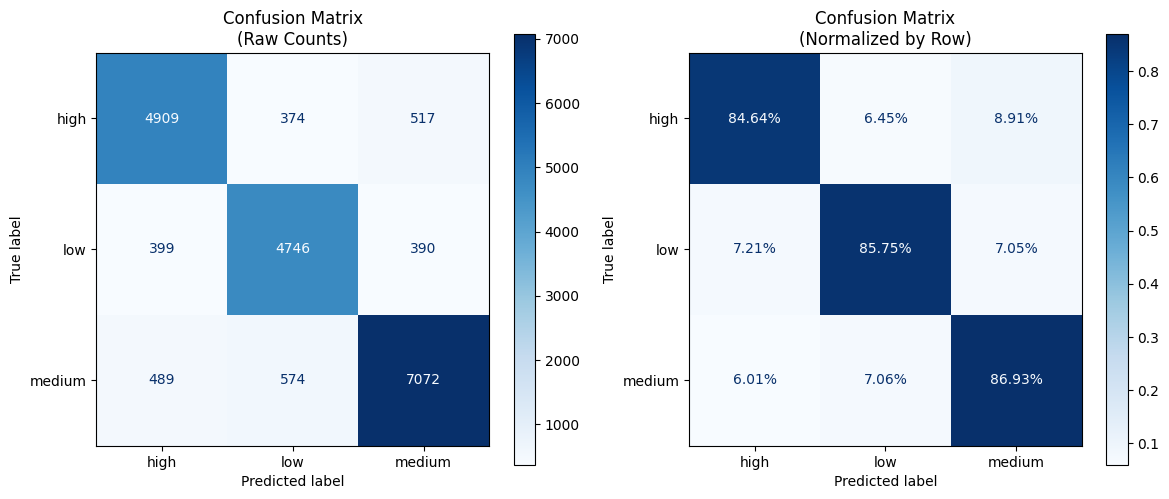


Classification rates per class:
high: 84.64% correct
low: 85.75% correct
medium: 86.93% correct


In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict on the validation set
y_val_pred = rf.predict(X_val_scaled)

# Compute confusion matrices (raw counts and normalized)
cm = confusion_matrix(y_val, y_val_pred, labels=rf.classes_)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot raw counts
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp1.plot(ax=ax1, cmap='Blues', values_format='d')
ax1.set_title('Confusion Matrix\n(Raw Counts)')

# Plot normalized values
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=rf.classes_)
disp2.plot(ax=ax2, cmap='Blues', values_format='.2%')
ax2.set_title('Confusion Matrix\n(Normalized by Row)')

plt.tight_layout()
plt.show()

# Print classification rates for each class
print("\nClassification rates per class:")
for i, class_name in enumerate(rf.classes_):
    print(f"{class_name}: {cm_normalized[i][i]:.2%} correct")

#### Random Forest Precision, Recall, F1

In [40]:
from sklearn.metrics import classification_report

# Predict on the validation set
y_val_pred = rf.predict(X_val_scaled)

# Print precision, recall, and F1 score for each class
print("Precision, Recall, and F1 Score (Validation Set):\n")
print(classification_report(y_val, y_val_pred, target_names=rf.classes_))

Precision, Recall, and F1 Score (Validation Set):

              precision    recall  f1-score   support

        high       0.85      0.85      0.85      5800
         low       0.83      0.86      0.85      5535
      medium       0.89      0.87      0.88      8135

    accuracy                           0.86     19470
   macro avg       0.86      0.86      0.86     19470
weighted avg       0.86      0.86      0.86     19470



### Deep Neural Net

#### Training and testing two hidden layers with Cross Entropy (CE) and L2 regularisation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Define the model
class MLP(nn.Module):
    def __init__(self, input_dim, hidden1, hidden2, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, num_classes)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Set your variables
hidden1 = 128  # number of nodes in first hidden layer
hidden2 = 128  # number of nodes in second hidden layer
lambda_l2 = 0.00  # L2 regularization strength
epochs = 100
batch_size = 16
learning_rate = 0.001
epochs_per_round = 100 # number of epochs to train before asking for user input

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_balanced)
y_test_enc = le.transform(y_test)
num_classes = len(le.classes_)

# Convert data to torch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_enc, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_enc, dtype=torch.long)

# Dataset and DataLoader
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

model = MLP(X_train_scaled.shape[1], hidden1, hidden2, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

# Training loop
total_epochs = 0
while True:
    for epoch in range(epochs_per_round):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            outputs = model(xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()
        total_epochs += 1
        if (epoch+1) % 5 == 0 or epoch == 0:
            print(f"Epoch {total_epochs}, Loss: {loss.item():.4f}")

    # Ask user if they want to continue
    cont = input("Continue training for another 30 epochs? (y/n): ").strip().lower()
    if cont != 'y':
        break
    # Ask for new learning rate
    try:
        new_lr = float(input("Enter new learning rate for next 30 epochs (current: {:.5f}): ".format(optimizer.param_groups[0]['lr'])))
        for param_group in optimizer.param_groups:
            param_group['lr'] = new_lr
    except Exception:
        print("Invalid input. Keeping previous learning rate.")

# Evaluate on test set
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    test_acc = accuracy_score(y_test_tensor.cpu(), predicted.cpu())
    print(f"Test accuracy: {test_acc:.4f}")

Epoch 1, Loss: 1.5905
Epoch 5, Loss: 0.2895
Epoch 10, Loss: 0.1316
Epoch 15, Loss: 0.2705
Epoch 20, Loss: 0.0385
Epoch 25, Loss: 0.0528
Epoch 30, Loss: 0.1058
Epoch 35, Loss: 0.0148
Epoch 40, Loss: 0.2304
Epoch 45, Loss: 0.3804
Epoch 50, Loss: 0.0949
Epoch 55, Loss: 0.0197
Epoch 60, Loss: 0.0086
Epoch 65, Loss: 0.0697
Epoch 70, Loss: 0.0142
Epoch 75, Loss: 0.3333
Epoch 80, Loss: 0.0042
Epoch 85, Loss: 0.0885
Epoch 90, Loss: 0.0004
Epoch 95, Loss: 0.0019
Epoch 100, Loss: 0.0282
Test accuracy: 0.8760


#### Deep neural net 5-fold cross-validation


Training MLP with hidden sizes: (128, 128)
  Fold 1, Epoch 1/100, Loss: 0.6345
  Fold 1, Epoch 10/100, Loss: 0.1965
  Fold 1, Epoch 20/100, Loss: 0.2355
  Fold 1, Epoch 30/100, Loss: 0.5639
  Fold 1, Epoch 40/100, Loss: 0.0768
  Fold 1, Epoch 50/100, Loss: 0.0835
  Fold 1, Epoch 60/100, Loss: 0.3000
  Fold 1, Epoch 70/100, Loss: 0.3709
  Fold 1, Epoch 80/100, Loss: 0.0929
  Fold 1, Epoch 90/100, Loss: 0.0037
  Fold 1, Epoch 100/100, Loss: 0.1770
  Fold 1: Accuracy = 0.8790
  Fold 2, Epoch 1/100, Loss: 0.5700
  Fold 2, Epoch 10/100, Loss: 0.0305
  Fold 2, Epoch 20/100, Loss: 0.0890
  Fold 2, Epoch 30/100, Loss: 0.3662
  Fold 2, Epoch 40/100, Loss: 0.1333
  Fold 2, Epoch 50/100, Loss: 0.3488
  Fold 2, Epoch 60/100, Loss: 0.1225
  Fold 2, Epoch 70/100, Loss: 0.0919
  Fold 2, Epoch 80/100, Loss: 0.2256
  Fold 2, Epoch 90/100, Loss: 0.1051
  Fold 2, Epoch 100/100, Loss: 0.0726
  Fold 2: Accuracy = 0.8710
  Fold 3, Epoch 1/100, Loss: 0.6474
  Fold 3, Epoch 10/100, Loss: 0.6069
  Fold 3, Epo

C:\Users\Volter\AppData\Local\Temp\ipykernel_26832\495735073.py:102: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, patch_artist=True)


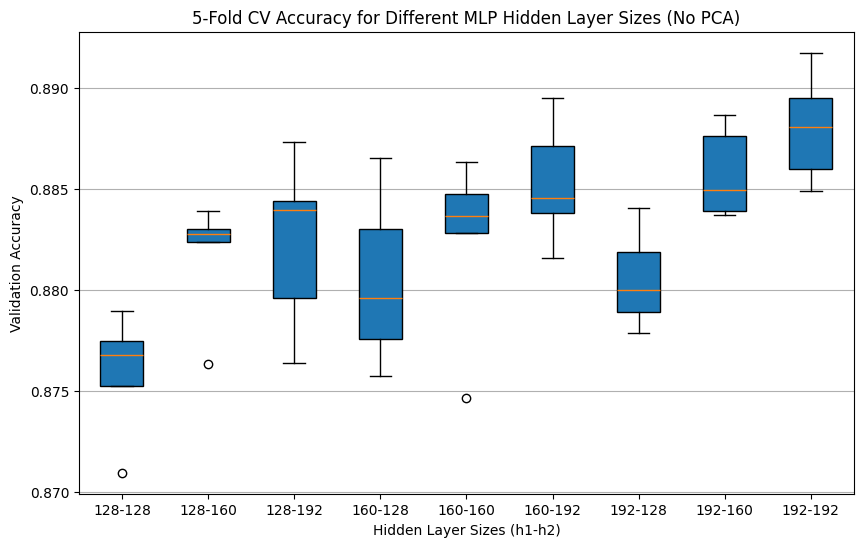

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# --- Prepare data ---
# Combine train and test sets for K-Fold
X_kfold = np.vstack((X_train, X_test))
y_fold = np.hstack((y_train, y_test))
# Scale X_kfold
X_kfold_scaled = scaler.fit_transform(X_kfold)

X = X_kfold_scaled
le = LabelEncoder()
y = le.fit_transform(y_fold)
num_classes = len(le.classes_)

# --- Model definition ---
class MLP(nn.Module):
    def __init__(self, input_dim, hidden1, hidden2, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, num_classes)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# --- Hyperparameters ---
hidden_sizes = [128, 160, 192]
lambda_l2 = 0.00
epochs = 100
batch_size = 16
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Cross-validation setup ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}  # {(h1, h2): [fold_accuracies]}

for h1 in hidden_sizes:
    for h2 in hidden_sizes:
        fold_accuracies = []
        print(f"\nTraining MLP with hidden sizes: ({h1}, {h2})")
        for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
            X_tr, X_val = X[train_idx], X[val_idx]
            y_tr, y_val = y[train_idx], y[val_idx]

            # Convert to tensors
            X_tr_tensor = torch.tensor(X_tr, dtype=torch.float32)
            y_tr_tensor = torch.tensor(y_tr, dtype=torch.long)
            X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
            y_val_tensor = torch.tensor(y_val, dtype=torch.long)

            train_dataset = torch.utils.data.TensorDataset(X_tr_tensor, y_tr_tensor)
            train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

            model = MLP(X.shape[1], h1, h2, num_classes).to(device)
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

            # Training loop
            for epoch in range(epochs):
                model.train()
                for xb, yb in train_loader:
                    xb, yb = xb.to(device), yb.to(device)
                    optimizer.zero_grad()
                    outputs = model(xb)
                    loss = criterion(outputs, yb)
                    loss.backward()
                    optimizer.step()
                if (epoch+1) % 10 == 0 or epoch == 0:
                    print(f"  Fold {fold+1}, Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")
                    
            # Validation
            model.eval()
            with torch.no_grad():
                X_val_tensor = X_val_tensor.to(device)
                y_val_tensor = y_val_tensor.to(device)
                outputs = model(X_val_tensor)
                _, predicted = torch.max(outputs, 1)
                acc = accuracy_score(y_val_tensor.cpu(), predicted.cpu())
                fold_accuracies.append(acc)
                print(f"  Fold {fold+1}: Accuracy = {acc:.4f}")

        results[(h1, h2)] = fold_accuracies



C:\Users\Volter\AppData\Local\Temp\ipykernel_26832\1585990878.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, patch_artist=True)


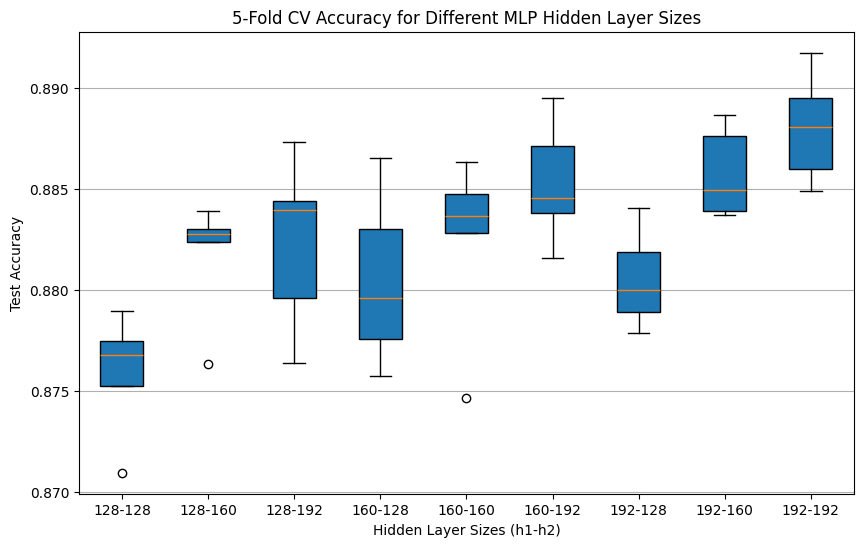

In [66]:
# --- Box and whisker plot ---
plt.figure(figsize=(10, 6))
labels = []
data = []
for (h1, h2), accs in results.items():
    labels.append(f"{h1}-{h2}")
    data.append(accs)
plt.boxplot(data, labels=labels, patch_artist=True) 
plt.xlabel("Hidden Layer Sizes (h1-h2)")
plt.ylabel("Test Accuracy")
plt.title("5-Fold CV Accuracy for Different MLP Hidden Layer Sizes")
plt.grid(True, axis='y')
plt.show()